# Lab session 9: Data Mining Applications

## Introduction 

The aim of this lab is for students to get experience with data mining applications, in particular on **Text Mining** and **Timeseries Mining** methods covered in week 11.

## 1. Text Mining

Text mining, also known as text data mining or textual data analysis, is the process of deriving meaningful information from text. It involves the discovery by computer of new, previously unknown information, by automatically extracting information from different written resources. A key element is the linking of the extracted information together to form new facts or new hypotheses to be explored further by more conventional means of experimentation. Text mining is different from what are traditional search and retrieval methods.

## Key Aspects of Text Mining
**Information Retrieval**: This is the foundation of text mining and involves the gathering of relevant text documents from a large corpus. The aim is to retrieve documents that are pertinent to a particular query or topic. Advanced retrieval methods use not only keywords but also semantic analysis to find relevant information.

**Natural Language Processing (NLP)**: Text mining relies heavily on NLP, which enables the understanding, interpretation, and generation of human languages by computers. NLP tasks include part-of-speech tagging, named entity recognition, and sentiment analysis, among others. These processes are crucial for converting unstructured text into structured data that can be analyzed.

**Text Analysis and Mining Techniques**: After processing the text, various analytical techniques are employed to extract insights. These include pattern recognition, clustering (grouping similar items), classification (assigning items to predefined categories), and association analysis (discovering relations between items).

**Topic Modeling and Clustering**: These techniques help to discover hidden thematic structures in large collections of texts. Topic modeling, for instance, uncovers topics represented in a corpus, enabling one to understand the main themes without reading every document.

## Applications of Text Mining
**Sentiment Analysis**: Used widely in business intelligence, sentiment analysis involves analyzing opinions, sentiments, evaluations, and attitudes towards entities such as products, services, organizations, individuals, issues, events, topics, and their attributes.

**Summarization**: Automatic summarization techniques generate a concise and coherent summary of a larger document, preserving the document's essential content.

**Information Extraction**: This involves extracting structured information from unstructured text, like extracting specific details such as company names, locations, product specifications, etc.

**Trend Analysis**: Text mining helps in identifying patterns and trends in data over time, especially useful in market analysis, scientific research, and social media monitoring.

Using python's [wikipedia package](https://pypi.org/project/wikipedia/), we can easily download content from Wikipedia and store it as a python object. For this example, we will use the content of the wikipedia entries that corredpond to the following terms:

    Data Science
    Big data
    Banking industry
    Financial services
    Basketball
    Handball
    Football

The content of each Wikipedia article is stored in list 'wiki_list' while the title of each article will be stored in variable 'title'.

In [1]:
# # Install/upgrade wikipedia and statsmodels packages for the lab
!pip install wikipedia
!pip install statsmodels --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.3
    Uninstalling patsy-0.5.3:
      Successfully uninstalled patsy-0.5.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.0
    Uninstalling statsmodels-0.14.0:
      Successfully uninstalled statsmodels-0.14.0


We begin with the retrieval of content from Wikipedia using the Python wikipedia package, which simplifies the process of downloading and storing text data. Each article's content is saved in a list, while their titles are stored separately. This preparation stage is crucial as it sets the foundation for the subsequent data mining process.

In [2]:
import pandas as pd
import wikipedia

articles=['Data Science','Big data','Banking industry','Financial services','Basketball','Handball','Football']
wiki_lst=[]
title=[]

# Load wikipedia articles
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

loading content:  Data Science
loading content:  Big data
loading content:  Banking industry
loading content:  Financial services
loading content:  Basketball
loading content:  Handball
loading content:  Football


As an example, we can display the first retrieved entry, which was for field "Data Science":

In [3]:
# Printing the first retrieved entry
print(wiki_lst[0])

Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data s

## Term Frequency (TF)

The process of representing documents for the k-means clustering algorithm involves transforming textual data into a numerical format that can be processed by machine learning models. This is where the concept of a vector space model, specifically the term-frequency/inverse-document-frequency (tf-idf) model, becomes essential.

Term Frequency (TF) is a measure of how frequently a term, \( w \), appears in a document, \( d \). It's calculated by dividing the number of times \( w \) appears in \( d \) by the total number of terms in \( d \). This normalization accounts for the varying lengths of documents. For example, a term appearing 5 times in a 100-word document has a higher significance than the same term appearing 5 times in a 1000-word document. The TF formula is expressed as:

\begin{equation}
\mathit{tf}(w,d) = \frac{\text{Number of times word } w \text{ appears in document } d}{\text{Total number of words in document } d}
\end{equation}

#### Inverse Document Frequency (IDF)

Inverse Document Frequency (IDF) provides a measure of how much information the word provides. It helps to weigh down the frequent terms while scaling up the rare ones. IDF is calculated by taking the logarithm of the ratio of the total number of documents to the number of documents containing the term \( w \). This calculation is important as it helps to diminish the weight of terms that occur very frequently in the dataset and increases the weight of terms that occur rarely. The IDF formula is:

\begin{equation}
\mathit{idf}(w) = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents containing word } w} \right)
\end{equation}

#### TF-IDF Calculation

TF-IDF stands for Term Frequency-Inverse Document Frequency, a combination of the above two concepts. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. The TF-IDF formula is given by:

\begin{equation}
\mathit{tfidf}(w,d) = \mathit{tf}(w,d) \times \mathit{idf}(w)
\end{equation}

This value is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus. The higher the TF-IDF score, the more unique a word is to a particular document.

#### Exclusion of Stop Words

In the calculation of TF-IDF, it's generally recommended to exclude stop words. Stop words are words which are filtered out before processing because they are common words that do not contribute much to the meaning of a document (e.g., "the", "is", "at", "which"). Excluding these words can help improve the performance of text mining tasks as it reduces the dimensionality of the data and focuses on more meaningful words.

#### Using Sklearn’s TfidfVectorizer

The `TfidfVectorizer` in sklearn's feature extraction module is a convenient tool for converting a collection of raw documents to a matrix of TF-IDF features. This utility handles all the calculations of term frequencies and inverse document frequencies, and builds a tf-idf weighted document-term matrix, which is crucial for further processing in text mining tasks like document clustering.

For computing the above feature, it is recommended that stop words are excluded. All the calculations are easily done with sklearn’s [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct way to use 'english' as a stop word
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(wiki_lst) # Create tf-idf feature of the wikipedia dataset

print(X.shape) # Print dimensions of tf-idf feature

(7, 6319)


As can be seen, each row of variable X is a feature representation of a Wikipedia article.

Now we have converted our dataset in a representation suitable for clustering and other data mining operations, and X can be used as input for the k-means algorithm.

One issue with the k-means algorithm is that the user needs to specify the number of clusters. One way of estimating an appropriate number of clusters is using the so-called elbow method, which calculates the sum of squared distances for various values of k (here we will use values of k from 2 to 7).

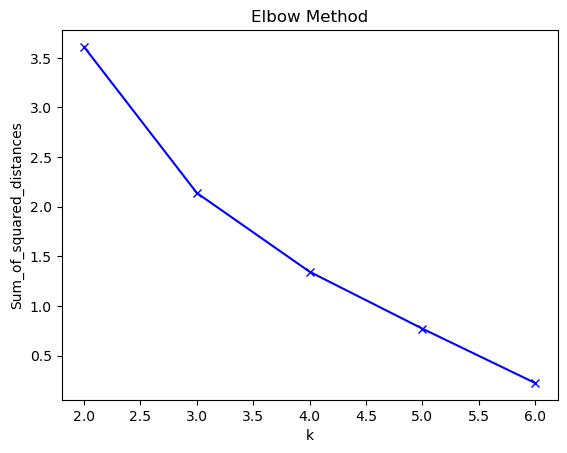

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

The plot shows a small dent appearing for k=3. We will therefore try to cluster into 3 groups.

In [6]:
# Fit k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                title  cluster
3  Financial services        0
2    Banking industry        0
1            Big data        1
0        Data Science        1
4          Basketball        2
5            Handball        2
6            Football        2


As we can see, the clustering produced some meaningful groupings: Basketball, Handball, and Football are all in one cluster; Data science and Big data are in another cluster; and Banking industry and Financial services are in a third cluster. With more data, more advanced clustering methods, and more elaborate feature extraction and pre-processing, we might be able to mine useful information from our text data.

## 2. Mining timeseries data - Smoothing


Smoothing is a technique applied to a timeseries to remove the fine-grained variation between time steps. The aim of smoothing is to remove noise and better expose the the underlying processes that generated the timeseries. Moving averages are a simple and common type of smoothing used in timeseries analysis and timeseries forecasting.

Calculating a moving average involves creating a new series where the values comprise the average of raw observations in the original timeseries. A moving average requires that you specify a **window size**. This defines the number of raw observations used to calculate the moving average value. The “moving” part in the moving average refers to the fact that the window defined by its window width is slid along the timeseries to calculate the average values in the new series.

For this lab, we will be looking at a particular case of moving average smoothing, called the **Trailing Moving Average**. In trailing moving average smoothing, the value at time $t$ is calculated as the average of the raw observations at and before time $t$.

It should be noted that calculating a moving average of a timeseries makes some assumptions about your data. One of these assumptions is that our timeseries is stationary, or does not show obvious trends (such as long-term increasing or decreasing movements) or seasonality (consistent periodic structure).

For this section, we will be using a dataset that describes the number of daily female births in California in 1959. The dataset units are a count and there are 365 observations corresponding to days in 1959. This dataset is a good example for exploring the moving average method as it does not show any clear trend or seasonality.

First we load and plot the dataset:

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


<Axes: xlabel='Date'>

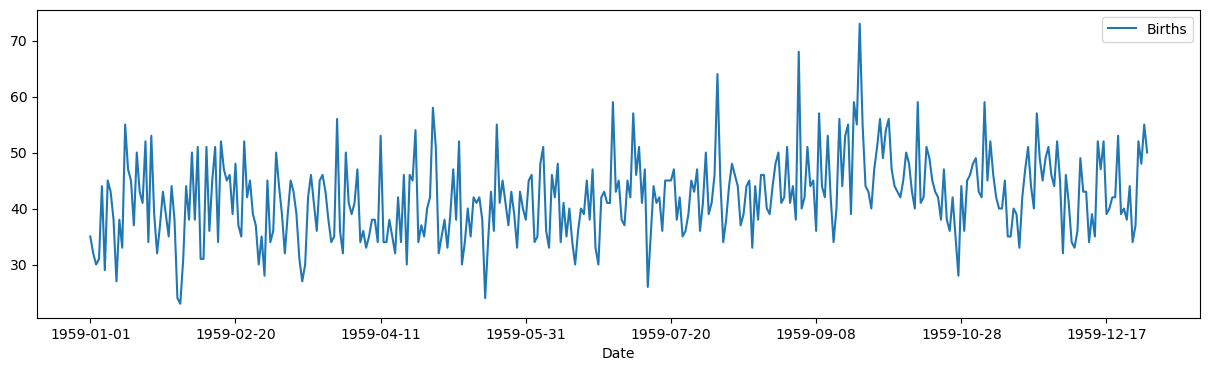

In [7]:
from pandas import read_csv
import matplotlib.pyplot as plt

series = read_csv('births.csv', header=0, index_col=0)

print(series.head())
series.plot(figsize=(15,4))

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

The rolling() found in Pandas will automatically group observations into a window. We can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset. New observations in the future can be just as easily transformed by keeping the raw values for the last few observations and updating a new average value.

To make this concrete, using trailing moving average with a window size of 3, the transformed value at time $t$ is calculated as the mean value for the previous 3 observations $\{t-2, t-1, t\}$.

               Births
Date                 
1959-01-01        NaN
1959-01-02        NaN
1959-01-03  32.333333
1959-01-04  31.000000
1959-01-05  35.000000
1959-01-06  34.666667
1959-01-07  39.333333
1959-01-08  39.000000
1959-01-09  42.000000
1959-01-10  36.000000


<Axes: title={'center': 'smoothed timeseries'}, xlabel='Date'>

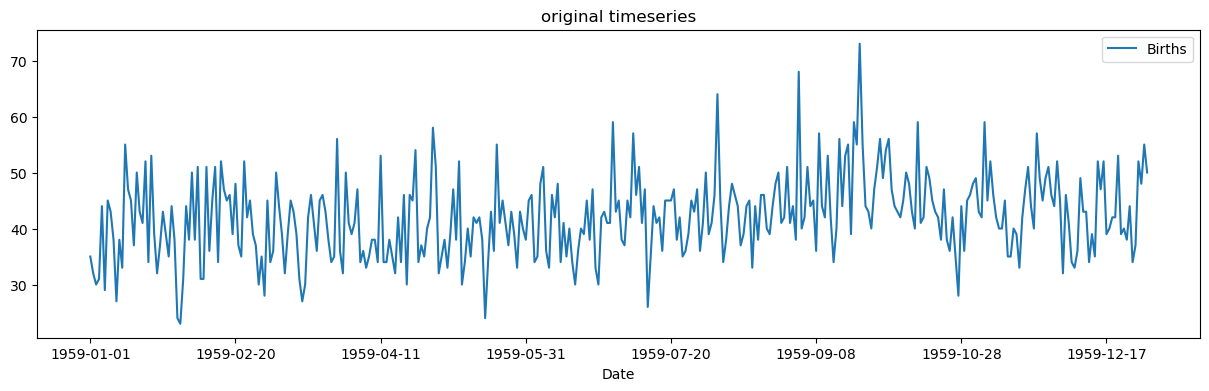

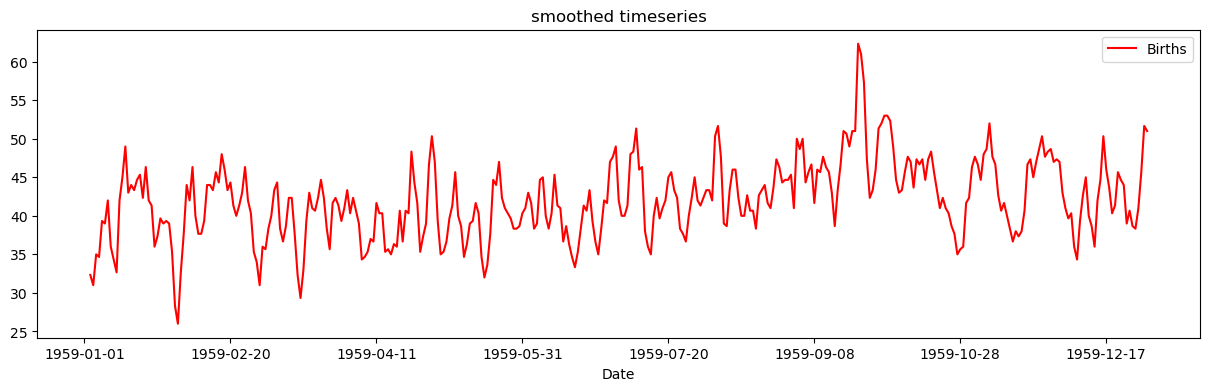

In [8]:
# Perform trailing moving average smoothing
rolling = series.rolling(window=3) # using a window of 3 samples: t, t-1, t-2
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
series.plot(figsize=(15,4),title='original timeseries')
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries')

From the printed first few values of the smoothed dataset, we can see that the first 2 smoothed observations will need to be discarded.

Please go through the pandas documentation for the Pandas [rolling() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) as to understand its input arguments and expected output. Following this, you can experiment with different window sizes and study the effect that different window sizes have on smoothing.

## 3. Mining timeseries data - Forecasting

Timeseries data is common in many domains, such as sensor networking, healthcare, and financial markets. In particular, **forecasting** is an important problem in timeseries analysis because it can be used to make predictions about data points in the future.

Altohugh state-of-the-art methods for timeseries forecasting rely on machine learning methods, before exploring such methods it is a good idea to exhaust "classical" linear methods for timeseries forecaseing. Classical time series forecasting methods are focused on exploring linear relationships from timeseries data, and perform well on a wide range of problems, assuming that our data is suitably prepared and the method is well configured. This section will outline a series of classical methods for timeseries forecasting.

### 3.1 Autoregressive (AR) Models

As a first step, we will create a simple synthetic signal which we will use as our dataset. The signal is a simple linear function consisting of 100 samples, which is perturbed by random noise:

Text(0, 0.5, 'Sample value')

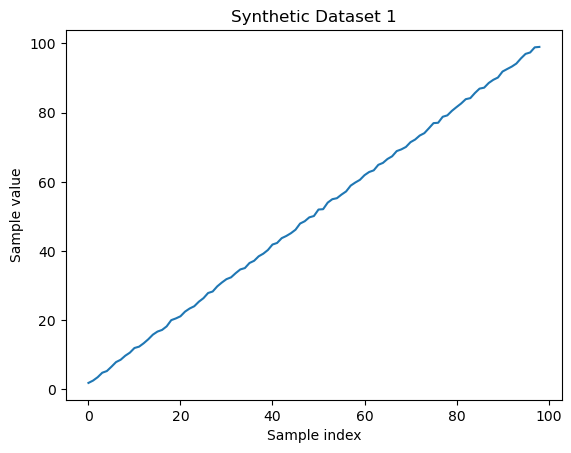

In [9]:
# Initialise
from random import random
import numpy as np

# Create and plot a synthetic signal
data = [x + random() for x in range(1, 100)]

data_array = np.array(data)

plt.plot(data_array)
plt.title('Synthetic Dataset 1')
plt.xlabel('Sample index')
plt.ylabel('Sample value')

**Autoregression (AR)** is a timeseries modeling and forecasting method which models the next step in a sequence as a linear function of the observations at previous time steps. This method is suitable for univariate timeseries without trend and seasonal components.

The notation for the model involves specifying the order of the model $p$ as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregressive model, which uses information from the immediately previous value of the signal to make a prediction for the next value.

More generally, for a signal $y$, an AR model defines the value $y_t$ (where $t$ is the time index) as a linear combination of the previous values of $y$ as follows:
\begin{equation}
y_t = \sum_{i=1}^{p} \alpha_i \cdot y_{t-i} + c + \epsilon_t
\end{equation}
where $p$ defines the model order, coefficients $\alpha_i$ and $c$ are learned from training data, and $\epsilon_t$ values are assumed to be white noise error terms that are uncorrelated with one another.

We can now initialise, fit, and make a prediction for an AR model in order to predict the next value in the timeseries:

In [10]:
# Initialise
from statsmodels.tsa.ar_model import AutoReg

# Fit Autoregressive model
model = AutoReg(data, lags=1,old_names=False) # "lags" indicates the model order
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3) # arguments denote which dataset indices to predict
print(yhat)

[ 99.9842451  100.96382063 101.94316192 102.922269  ]


There are many more input arguments that we can use in the AutoReg function; for more information on input/output arguments please view the relevant [AutoReg function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html).

### 3.2 Moving Average (MA) Models

While autoregression is a useful predictive property of a timeseries, it does not always explain all the variations. In fact, the unexpected component of the variations (shocks), does impact future values of the timeseries. This component can be captured with the use of a **moving average model (MA)**. The moving average model predicts subsequent series values on the basis of the past history of deviations from predicted values. A deviation from a predicted value can be viewed as white noise, or a shock.

The moving average model is defined as follows:
\begin{equation}
y_t = \sum_{i=1}^{q} b_i \cdot \epsilon_{t-i} + c + \epsilon_t
\end{equation}
Here, $c$ is the mean of the timeseries. The values $b_1,\ldots,b_q$ are the coefficients that need to be learned from the data. The moving average model is quite different from the autoregressive model, in that it relates the current value to the mean of the series and the previous history of deviations from forecasts, rather than the actual values. Here the values of $\epsilon_t$ are assumed to be white noise error terms that are uncorrelated with one another.

We can now initialise, fit, and make a prediction for an MA model in order to predict the next value in the timeseries:

In [11]:
# Initialise
from statsmodels.tsa.arima.model import ARIMA
from random import random

# Fit MA model
model = ARIMA(data, order=(0, 0, 3)) # The 3rd 'order' argument denotes q=3, ie. a 3rd order MA model
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3) # arguments denote which dataset indices to predict
print(yhat)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[88.1638966  66.89373875 52.8580973  50.34500213]


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


As can be seen from the above ARIMA() function, this is a more general function that goes beyond an MA model. By setting the first two arguments for 'order' to 0, we can achieve an MA function. There are many more input arguments that we can use in the ARIMA function; for more information on input/output arguments please view the relevant [ARIMA function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html).

### 3.3 Autoregressive Moving Average (ARMA) Models

A more general model may be obtained by combining the power of both the autoregressive model and the moving average model. The idea is to learn the appropriate impact of both the autocorrelations and the shocks in predicting timeseries values. The two models can be combined with $p$ autoregressive terms and $q$ moving average terms.

This model is referred to as the ARMA model, which can be formulated as follows:
\begin{equation}
y_t = \sum_{i=1}^{p} \alpha_i \cdot y_{t-i} + \sum_{i=1}^{q} b_i \cdot \epsilon_{t-i} + c + \epsilon_t
\end{equation}
The aforementioned model is the ARMA($p$, $q$) model.

We will now create a new synthetic dataset of 100 samples which consists of (pseudo)random noise:

Text(0, 0.5, 'Sample value')

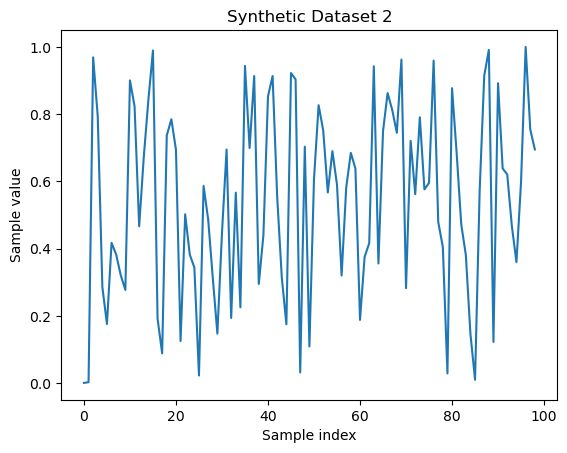

In [12]:
# Create and plot a synthetic signal
data2 = [random() for x in range(1, 100)]

data_array_2 = np.array(data2)

plt.plot(data_array_2)
plt.title('Synthetic Dataset 2')
plt.xlabel('Sample index')
plt.ylabel('Sample value')

We can now initialise, fit, and make a prediction for an ARMA model in order to predict the next value in the timeseries:

In [13]:
# Fit ARMA model
model = ARIMA(data2, order=(2, 0, 1)) # p=2, q=1
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data2), len(data2)+3) # arguments denote which dataset indices to predict
print(yhat)

[0.50438234 0.50207498 0.54013578 0.55244254]


Similar to the MA model, for the ARMA model we are using the ARIMA() function, which is a more general function that goes beyod an ARMA model. By setting the second argument for 'order' to 0, we can achieve an ARMA function. There are many more input arguments that we can use in the ARIMA function; for more information on input/output arguments please view the relevant [ARIMA function documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html).

### 3.4 Autoregressive Integrated Moving Average (ARIMA) Models

In many cases, nonstationary data can be addressed by combining differencing with the autoregressive moving average model. This results in the **autoregressive integrated moving average model (ARIMA)**. In principle, differences of any order may be used, although first and second-order differences are most commonly used. If the order of the differencing is $d$, then this model is referred to as the ARIMA($p$, $d$, $q$) model.

We will now use the first synthetic dataset of 100 samples to fit and make a prediction using an ARIMA(1,1,1) model:

In [14]:
# Fit ARIMA model
model = ARIMA(data, order=(1, 2, 1)) # p=1, d=2, q=1
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+3, typ='levels')
print(yhat)

[100.49682608 101.21192083 102.36672608 103.27279043]


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## 4. Mining timeseries data - Discrete Fourier Transform (DFT)

The discrete Fourier transform (DFT) is a commonly used method for data transformation in timeseries. More broadly, DFT is one of the fundamental tools used in the field of signal processing and is useful across numerous applications. The DFT is able to decompose a given timeseries into a linear combination of sinusoids.

As an example, let us consider the following example timeseries $x$ which corresponds to a periodic timeseries (specifically a cosine function) perturbed by random noise:

Text(0.5, 0, 'Time (index $n$)')

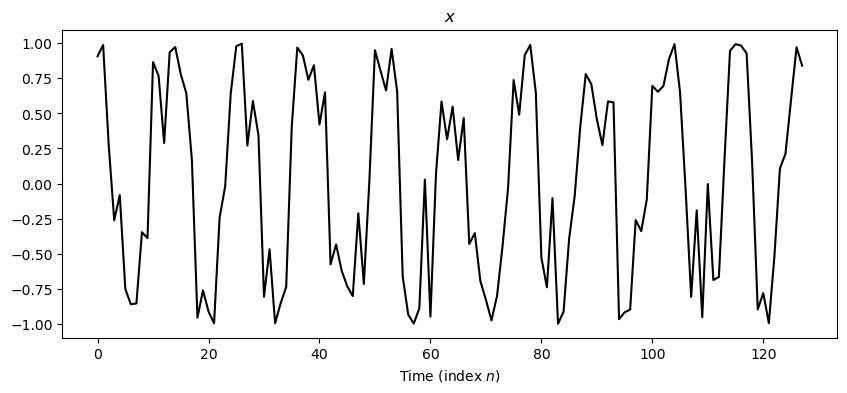

In [15]:
import numpy as np

# Example synthetic timeseries
N = 128
n = np.arange(N)
k = 10
x = np.cos(2 * np.pi * (k * n / N) + 2 * (np.random.rand(N) - 0.5)) 

# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(x, 'k')
plt.xlabel('Time (index $n$)')

The DFT is efficiently implemented in python using the **Fast Fourier Transform (FFT)**, an algorithm that computes the discrete Fourier transform in a computationally efficient manner.

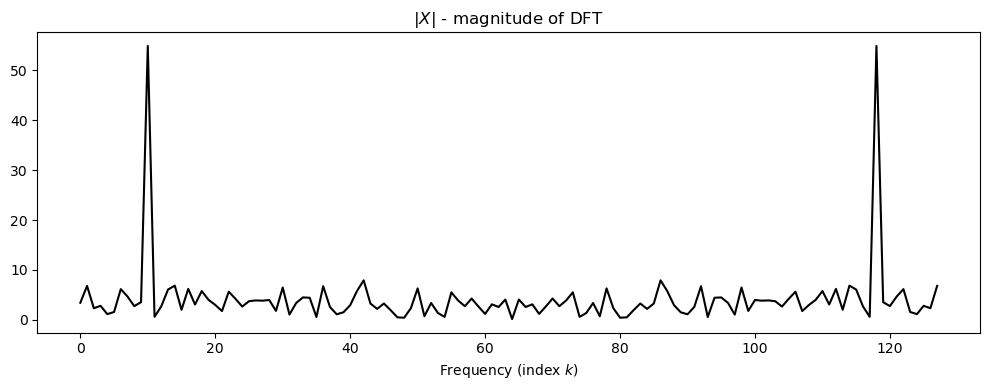

In [16]:
# numpy implementation of FFT
Xfft = np.fft.fft(x)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

The above figure is symmetric, and the upper half of the above figure can be discarded for analysing the timeseries, but it is useful if we would like to reconstruct the original timeseries. By inspecting the lower half of the DFT, we can see one clear peak. This peak indicates the predominant (i.e. most important) frequency of the timeseries. This frequency indicates the predominant period of the timeseries, in other words the length of the unit in samples which is repeated throughout the timeseries. We observe one such predominant frequency and corresponding period, since the timeseries consists of a (periodic) cosine function.

If we have a timeseries which is expressed in a physical unit (e.g. seconds, milliseconds) it is possible to associate this predominant frequency to a frequency unit such as Hz; this is outside the scope of this lab tutorial.

Finally, one of the benefits of the DFT and FFT is the fact that an inverse transform is also defined, which allows us to convert the above representation over frequency back to the original representation over time. This can be achieved by the **inverse DFT** (and the inverse FFT) as follows:

/opt/conda/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


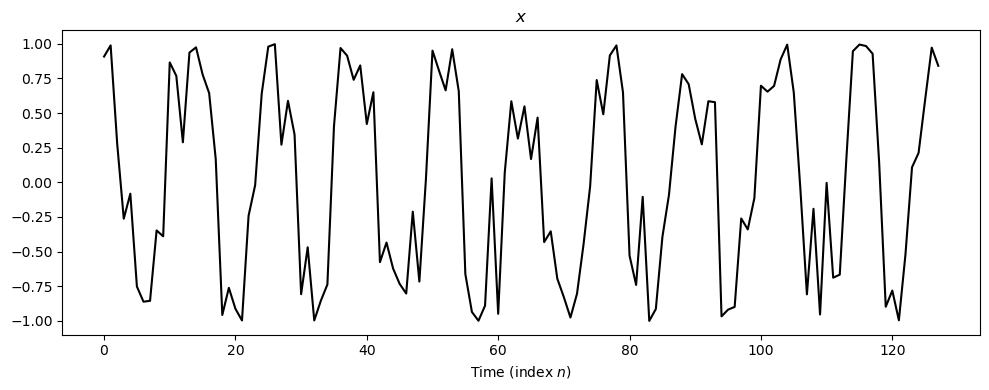

In [17]:
# Inverse FFT
x_invfft = np.fft.ifft(Xfft)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(x_invfft, 'k')
plt.xlabel('Time (index $n$)')
plt.tight_layout()